In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [2]:
hourly_pay = np.genfromtxt('hourly_pay')

In [3]:
hourly_pay

array([ 6.63,  0.  , 14.34, ...,  1.6 ,  0.8 , 11.01])

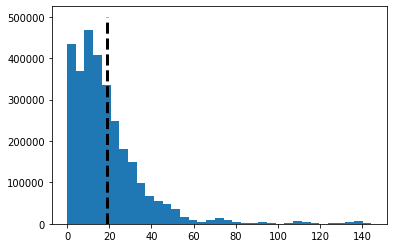

In [4]:
plt.hist(hourly_pay, bins=35)
plt.vlines(np.mean(hourly_pay), 0, 500000, color = 'k', lw=3, linestyles='dashed')
plt.show()

In [5]:
population_mean = hourly_pay.mean()
print(population_mean)

18.83931814333332


In [6]:
samp1 = random.sample(list(hourly_pay), 150)
print(np.mean(samp1))

20.243466666666663


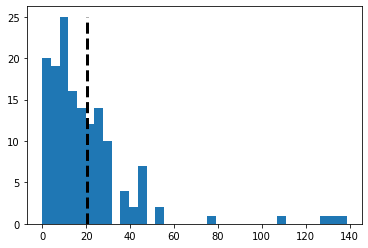

In [7]:
plt.hist(samp1, bins = 35)
plt.vlines(np.mean(samp1), 0, 25, color = 'k', lw=3, linestyles='dashed')
plt.show()

In [8]:
samp2 = random.sample(list(hourly_pay), 150)
print(np.mean(samp2))

17.554399999999998


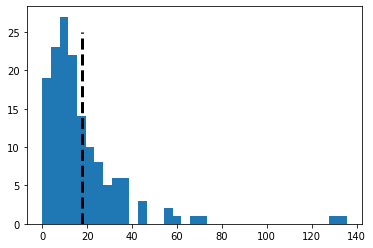

In [9]:
plt.hist(samp2, bins = 35)
plt.vlines(np.mean(samp2), 0, 25, color = 'k', lw=3, linestyles='dashed')
plt.show()

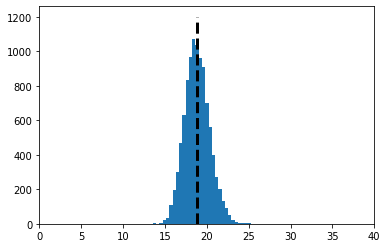

In [10]:
population = list(hourly_pay)
sample_means = []

for i in range(10000):
    samp = random.sample(population, 150)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1200, lw=3, linestyles='dashed')
plt.xlim(0,40)
plt.show()

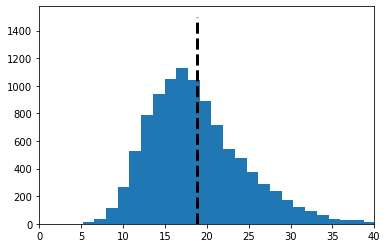

In [11]:
population = list(hourly_pay)
sample_means = []

for i in range(10000):
    samp = random.sample(population, 10)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1500, lw=3, linestyles='dashed')
plt.xlim(0,40)
plt.show()

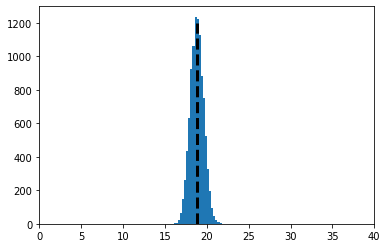

In [12]:
population = list(hourly_pay)
sample_means = []

for i in range(10000):
    samp = random.sample(population, 500)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 30)
plt.vlines(np.mean(sample_means), 0, 1200, lw=3, linestyles='dashed')
plt.xlim(0,40)
plt.show()

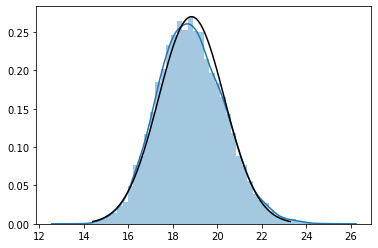

In [25]:
# and to see how this is very close to a normal distribution with standard deviation = sd(population)/sqrt(sample size):
from scipy import stats

sample_means = []

for i in range(10000):
    samp = random.sample(population, 150)
    sample_means.append(np.mean(samp))

sns.distplot(sample_means)


mu = population_mean
sigma = np.std(population)/(150**.5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k')


plt.show()

In [26]:
# let's just pick one sample.. say..
random.seed(3)
sample = random.sample(list(hourly_pay), 150)

In [27]:
print(np.mean(sample))

16.433400000000002


In [28]:
sample[0:5]

[27.78, 18.41, 27.3, 8.75, 11.55]

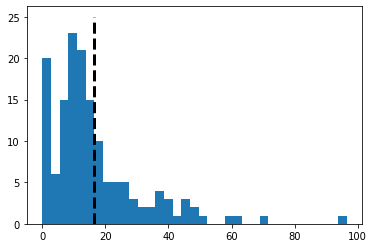

In [29]:
plt.hist(sample, bins = 35)
plt.vlines(np.mean(sample), 0, 25, color = 'k', lw=3, linestyles='dashed')
plt.show()

In [35]:
standard_error = np.std(samp1)/(150**.5)
print(standard_error)

true_se = np.std(population)/(150**.5)
print(true_se)

1.8144361131685984
1.4779593607055448


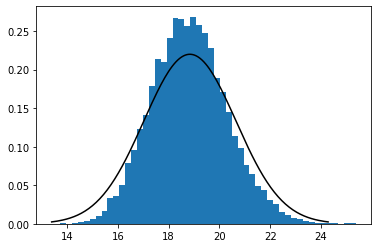

In [34]:
sample_means = []
for i in range(10000):
    samp = random.sample(population, 150)
    sample_means.append(np.mean(samp))

plt.hist(sample_means, bins = 50, density=True)


mu = population_mean
sigma = standard_error
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k')


plt.show()

In [41]:
#demo:
print(stats.norm.ppf(0.975, np.mean(population), standard_error))
print(stats.norm.ppf(0.025, np.mean(population), standard_error))

22.395547577392612
15.283088709274024


In [39]:
lower_ci = stats.norm.ppf(0.975, np.mean(sample), standard_error)
upper_ci =stats.norm.ppf(0.025, np.mean(sample), standard_error)
print(lower_ci)
print(upper_ci)

19.989629434059296
12.877170565940707


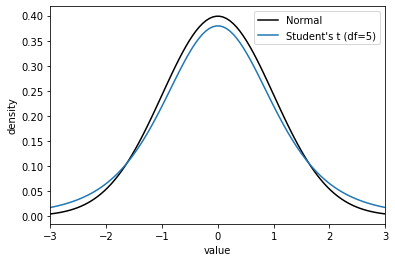

In [42]:
# an aside, if there's time:
import scipy.stats as stats
import math
from scipy.stats import t
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label="Normal")
rv = t(df=5, loc=0, scale=1)
t_val = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = rv.pdf(x) 

plt.xlim(-3,3)
plt.plot(t_val,y, label = "Student's t (df=5)")
plt.xlabel('value')
plt.ylabel('density')
plt.legend()
plt.show()